# "Junior Data Scientist – Trader Behavior Insights"-Nandkumar_Bandivdekar


IMPORT LIBRARIES 

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

LOAD DATASETS

We load both datasets into Pandas DataFrames.

In [2]:
trader_df = pd.read_csv(r"C:\Users\HP\Downloads\historical_data.csv")
sentiment_df = pd.read_csv(r"C:\Users\HP\Downloads\fear_greed_index.csv")

Data Overview 

In [3]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

RENAME COLUMNS FOR CONSISTENCY

In [7]:

#To ensure both datasets have consistent column names for easy merging later.
sentiment_df.rename(columns={
    'date': 'Date',
    'classification': 'Classification'
}, inplace=True)

In [8]:
trader_df.rename(columns={
    'Timestamp IST': 'time',
    'Account': 'account',
    'Coin': 'symbol',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Side': 'side',
    'Start Position': 'start_position',
    'Direction': 'event',
    'Closed PnL': 'closedPnL'
}, inplace=True)


CONVERT DATE COLUMNS TO DATETIME

In [9]:

# Convert sentiment data's Date column to datetime format.
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
trader_df['time'] = pd.to_datetime(trader_df['time'])

In [10]:
# Extract only the date (drop the time part) for daily matching with sentiment data.
trader_df['Date'] = trader_df['time'].dt.date
trader_df['Date'] = pd.to_datetime(trader_df['Date'])


MERGE DATASETS

In [11]:

merged_df = pd.merge(trader_df, sentiment_df[['Date', 'Classification']],
                     on='Date', how='left')

CALCULATE AVERAGE PNL BY SENTIMENT

In [12]:
#To see if traders perform differently during Fear vs Greed market conditions.
# Group by Classification (Fear/Greed) and take the mean closedPnL.
avg_pnl = merged_df.groupby('Classification')['closedPnL'].mean().reset_index()

FIND TOP 5 MOST PROFITABLE ACCOUNTS

In [13]:
#To identify traders who are consistently profitable across the dataset.
# Group by account, sum their closedPnL, sort in descending order, and select top 5.
top_accounts = merged_df.groupby('account')['closedPnL'].sum().sort_values(ascending=False).head(5)


SAVE MERGED DATA TO CSV

In [14]:
#To keep a processed dataset for further analysis or reporting.
merged_df.to_csv("merged_analysis.csv", index=False)

VISUALIZE AVERAGE PNL VS SENTIMENT

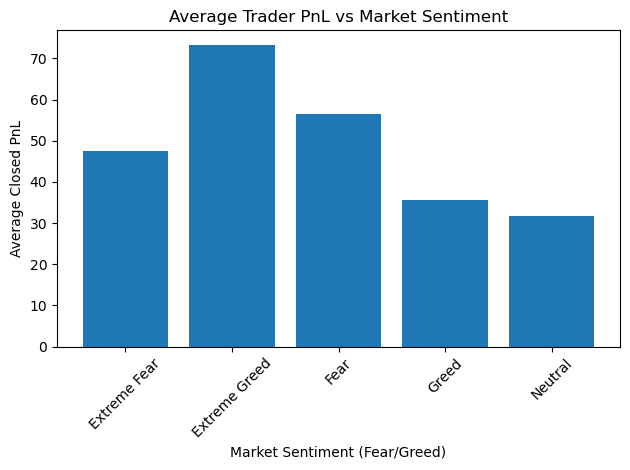

In [15]:
#Visual representation makes it easier to compare trader performance
#        under Fear vs Greed market conditions.
plt.bar(avg_pnl['Classification'], avg_pnl['closedPnL'])
plt.xlabel("Market Sentiment (Fear/Greed)")
plt.ylabel("Average Closed PnL")
plt.title("Average Trader PnL vs Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PRINT INSIGHTS TO CONSOLE

In [16]:
# Print insights
print("Average PnL by Sentiment:\n", avg_pnl)
print("\nTop 5 Profitable Accounts:\n", top_accounts)

Average PnL by Sentiment:
   Classification  closedPnL
0   Extreme Fear  47.446302
1  Extreme Greed  73.144030
2           Fear  56.544720
3          Greed  35.652184
4        Neutral  31.746470

Top 5 Profitable Accounts:
 account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
Name: closedPnL, dtype: float64
